# TVB NEST

## Custom co-simulation with TVB and NEST on CSCS infrastructure

In [1]:
!pip install pyunicore --upgrade
import pyunicore.client as unicore_client

token = clb_oauth.get_token()
tr = unicore_client.Transport(token)
r = unicore_client.Registry(tr, unicore_client._HBP_REGISTRY_URL)

# use "DAINT-CSCS" -- change if another supercomputer is prepared for usage
site_client = r.site('DAINT-CSCS')
site_client.site_url

Requirement already up-to-date: pyunicore in /opt/app-root/lib/python3.6/site-packages (0.5.9)
You should consider upgrading via the '/opt/app-root/bin/python3 -m pip install --upgrade pip' command.


'https://brissago.cscs.ch:8080/DAINT-CSCS/rest/core'

In [12]:
script_to_run = "launch_example.py"
job_configuration = "job_config.sh"

job_config = {
    "From": "https://raw.githubusercontent.com/the-virtual-brain/tvb-multiscale/master/docker/cosimulate_with_staging.sh",
    "To" : job_configuration
}

script = {
    "From": "https://raw.githubusercontent.com/the-virtual-brain/tvb-multiscale/master/docker/launch_example.py",
    "To" : script_to_run
}

my_job = {}
my_job['Executable'] = job_configuration
my_job['Arguments'] = [script_to_run]
my_job['Imports'] = [job_config, script]
my_job['Resources'] = { "CPUs": "1" }
my_job

{'Executable': 'job_config.sh',
 'Arguments': ['launch_example.py'],
 'Imports': [{'From': 'https://raw.githubusercontent.com/the-virtual-brain/tvb-multiscale/master/docker/cosimulate_with_staging.sh',
   'To': 'job_config.sh'},
  {'From': 'https://raw.githubusercontent.com/the-virtual-brain/tvb-multiscale/master/docker/launch_example.py',
   'To': 'launch_example.py'}],
 'Resources': {'CPUs': '1'}}

In [13]:
# Actual job submission
job = site_client.new_job(job_description=my_job, inputs=[])
job.properties

{'owner': 'UID=lia.domide@codemart.ro',
 'submissionPreferences': {'UC_OAUTH_BEARER_TOKEN': ['eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJfNkZVSHFaSDNIRmVhS0pEZDhXcUx6LWFlZ3kzYXFodVNJZ1RXaTA1U2k0In0.eyJqdGkiOiJhNDhiOGY4My0wMjlmLTQ5YmYtOTdhMC1iNDkxMjIyNGUzNGYiLCJleHAiOjE1OTE2OTEyNzgsIm5iZiI6MCwiaWF0IjoxNTkxMDkwOTYzLCJpc3MiOiJodHRwczovL2lhbS5lYnJhaW5zLmV1L2F1dGgvcmVhbG1zL2hicCIsImF1ZCI6WyJyZWFsbS1tYW5hZ2VtZW50IiwieHdpa2kiLCJ0ZWFtIiwiZ3JvdXAiXSwic3ViIjoiYzg0M2M1NDMtNzIyNy00YzkxLWJjMmYtZDU5MGM5YWRmOGFmIiwidHlwIjoiQmVhcmVyIiwiYXpwIjoianVweXRlcmh1YiIsImF1dGhfdGltZSI6MTU5MTA4NjQ3OCwic2Vzc2lvbl9zdGF0ZSI6IjdmYzAxMzA5LTczNjEtNGMwYy04ZjFjLTY0MDliYzNiNTE3MSIsImFjciI6IjAiLCJhbGxvd2VkLW9yaWdpbnMiOlsiaHR0cHM6Ly9sYWIuZWJyYWlucy5ldS8iXSwicmVhbG1fYWNjZXNzIjp7InJvbGVzIjpbIm9mZmxpbmVfYWNjZXNzIl19LCJzY29wZSI6ImNvbGxhYi5kcml2ZSBjbGIuZHJpdmU6d3JpdGUgcHJvZmlsZSBvZmZsaW5lX2FjY2VzcyBlbWFpbCBvcGVuaWQgY2xiLmRyaXZlOnJlYWQiLCJlbWFpbF92ZXJpZmllZCI6dHJ1ZSwibmFtZSI6IkxpYSBEb21pZGUiLCJtaXRyZWlkLXN1YiI6IjMwMjQ0My

In [20]:
# Wait for job to complete
job.is_running()

True

In [25]:
job.properties['status']

'SUCCESSFUL'

In [26]:
wd = job.working_dir
wd.properties

{'owner': 'UID=lia.domide@codemart.ro',
 'umask': '77',
 'mountPoint': '/scratch/snx3000/unicore/FILESPACE/f61fb842-faec-44cc-8b7a-d18aba6a4605/',
 'freeSpace': 6042161214001152,
 '_links': {'action:rename': {'description': "Rename file 'from' to file 'to'.",
   'href': 'https://brissago.cscs.ch:8080/DAINT-CSCS/rest/core/storages/f61fb842-faec-44cc-8b7a-d18aba6a4605-uspace/actions/rename'},
  'self': {'href': 'https://brissago.cscs.ch:8080/DAINT-CSCS/rest/core/storages/f61fb842-faec-44cc-8b7a-d18aba6a4605-uspace'},
  'files': {'description': 'Files',
   'href': 'https://brissago.cscs.ch:8080/DAINT-CSCS/rest/core/storages/f61fb842-faec-44cc-8b7a-d18aba6a4605-uspace/files'},
  'action:copy': {'description': "Copy file 'from' to file 'to'.",
   'href': 'https://brissago.cscs.ch:8080/DAINT-CSCS/rest/core/storages/f61fb842-faec-44cc-8b7a-d18aba6a4605-uspace/actions/copy'}},
 'resourceStatusMessage': 'N/A',
 'siteName': 'DAINT-CSCS',
 'description': "Job's workspace",
 'acl': [],
 'usableSpa

## Result
The following cell should be run and inspected several times, until you see that the operation is done.
It will take a bit until the "output" is created, so try to run repetedly this cell, if you get errors at the begining.

In [27]:
out = wd.stat("stdout")
f = out.raw()

all_lines = f.read().splitlines()
all_lines[-20:]

[b'[1549654.504278714] [nid00037-1334] [CLI] [INFO] Successfully executed run command',
 b'TVB-NEST test completed in 42 seconds',
 b' ',
 b'Batch Job Summary Report for Job "UNICORE_job" (22983870) on daint',
 b'-----------------------------------------------------------------------------------------------------',
 b'             Submit            Eligible               Start                 End    Elapsed  Timelimit ',
 b'------------------- ------------------- ------------------- ------------------- ---------- ---------- ',
 b'2020-06-02T14:24:25 2020-06-02T14:24:25 2020-06-02T14:24:26 2020-06-02T14:26:03   00:01:37   01:00:00 ',
 b'-----------------------------------------------------------------------------------------------------',
 b'Username    Account     Partition   NNodes   Energy',
 b'----------  ----------  ----------  ------  --------------',
 b'bp000226    ich012      normal           1   13.32K joules',
 b' ',
 b'This job did not utilize any GPUs',
 b' ',
 b'-----------

In [28]:
err = wd.stat("stderr")
f = err.raw()
f.readlines()

[b'/home/docker/packages/tvb-root/scientific_library/tvb/datatypes/surfaces.py:61: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.\n',
 b'  warnings.warn(msg)\n']

In [29]:
wd.listdir()

{'UNICORE_SCRIPT_EXIT_CODE': PathFile: UNICORE_SCRIPT_EXIT_CODE,
 '.UNICORE_32fbef3b-5c85-44b4-b21e-28cf48a9e92e/': PathDir: .UNICORE_32fbef3b-5c85-44b4-b21e-28cf48a9e92e/,
 'stderr': PathFile: stderr,
 '.UNICORE_d3c0da5d-ddd1-4edb-8c80-108775d6051e/': PathDir: .UNICORE_d3c0da5d-ddd1-4edb-8c80-108775d6051e/,
 'bss_submit_1591100664652': PathFile: bss_submit_1591100664652,
 'outputs/': PathDir: outputs/,
 'UNICORE_Job_1591100664652': PathFile: UNICORE_Job_1591100664652,
 'job_config.sh': PathFile: job_config.sh,
 'stdout': PathFile: stdout,
 'launch_example.py': PathFile: launch_example.py}

Now we are downloading the results and plot them

In [30]:
wd.stat("outputs/res/results.npy").download("results.npy")
wd.stat("outputs/res/connectivity_weights.npy").download("connectivity_weights.npy")
wd.stat("outputs/res/connectivity_lengths.npy").download("connectivity_lengths.npy")

import numpy
result_ts = numpy.load("results.npy")
connectivity_weights = numpy.load("connectivity_weights.npy")
connectivity_lengths = numpy.load("connectivity_lengths.npy")

2020-06-02 14:27:31,464 - WARNING - tvb.simulator.common - psutil module not available: no warnings will be issued when a
    simulation may require more memory than available
   INFO  log level set to INFO
   INFO  NumExpr defaulting to 8 threads.
WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.epileptor.Epileptor.state_variable_range = Final(field_type=<class 'dict'>, default={'x1': array([-2.,  1.]), 'y1': array([-20.,   2.]), 'z': array([2., 5.]), 'x2': array([-2.,  0.]), 'y2': array([0., 2.]), 'g': array([-1.,  1.])}, required=True)
WARNING  default contains values out of the declared domain. Ex 1.0 
   attribute  tvb.simulator.models.epileptor.Epileptor2D.tt = NArray(label='tt', dtype=float64, default=array([1.]), dim_names=(), ndim=None, required=True)
WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.epileptor.Epil

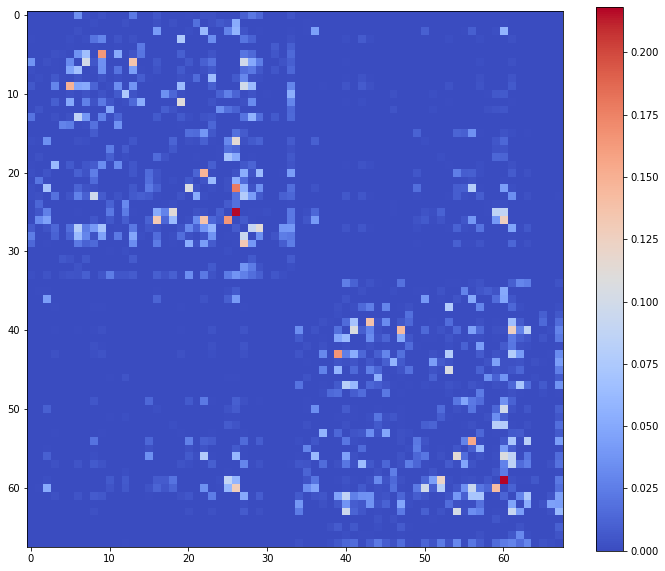

In [31]:
%matplotlib inline
from tvb.simulator.lab import *
from tvb.simulator.plot import tools

tools.plot_matrix(connectivity_weights)

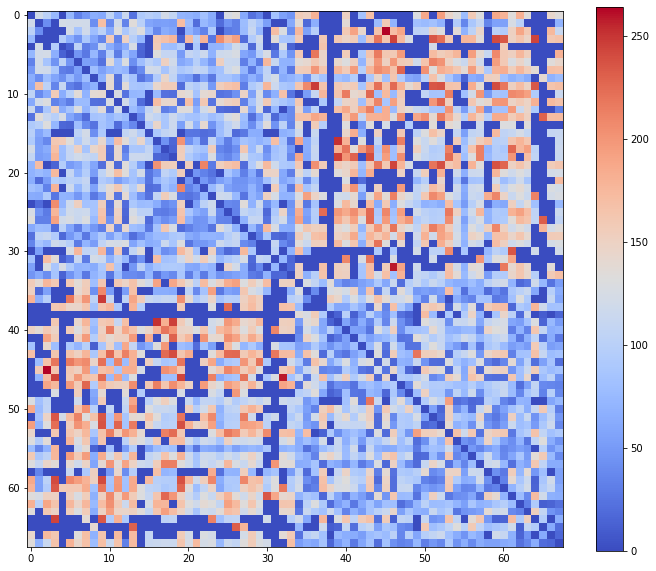

In [32]:
tools.plot_matrix(connectivity_lengths)

Text(0.5, 1.0, 'TS result')

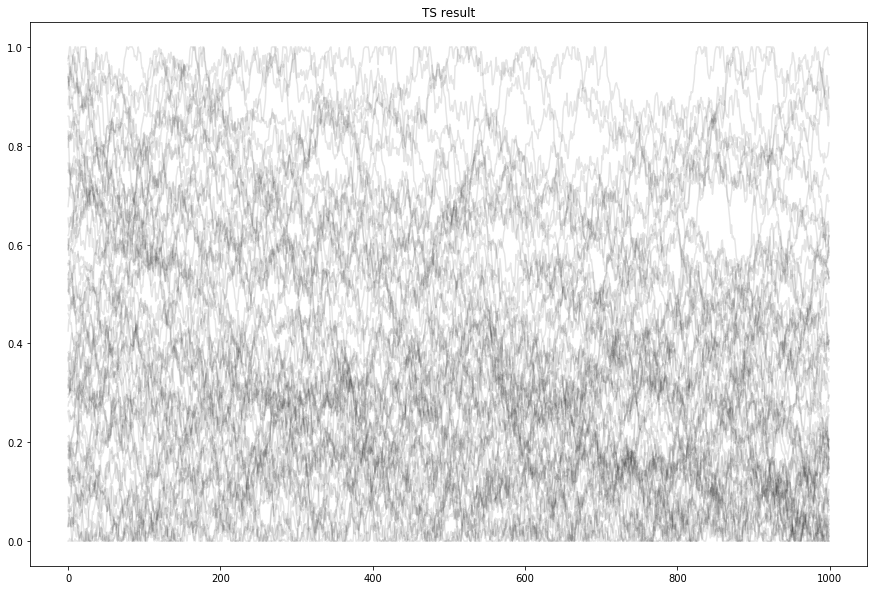

In [33]:
from matplotlib.pyplot import *
figure(figsize=(15, 10))
plot(numpy.arange(1000), result_ts[:, 0, :, 0], 'k', alpha=0.1)
title("TS result")